In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

Loading dataset


In [203]:
df = pd.read_csv('sales_data.csv')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub_category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

In [205]:
df.dropna(inplace=True)

In [206]:
df.describe(include = 'all')


,id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
count,9789.000000,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789,9789.000000,9789,9789,9789,9789,9789,9789.000000
unique,NaN,4916,1229,1326,4,793,793,3,1,529,48,NaN,4,1860,3,17,1848,NaN
top,NaN,CA-2018-100111,2017-09-05,2018-09-26,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5849,35,35,5096,9789,891,1946,NaN,3140,18,5903,1492,47,NaN
mean,4896.705588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.116193
std,2827.486899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,625.302079
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2449.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.384000
75%,7344.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.392000


Preprocessing

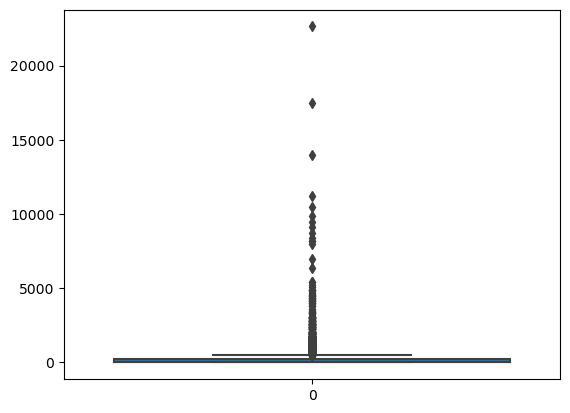

In [207]:
sns.boxplot(df['sales'])    
plt.show()

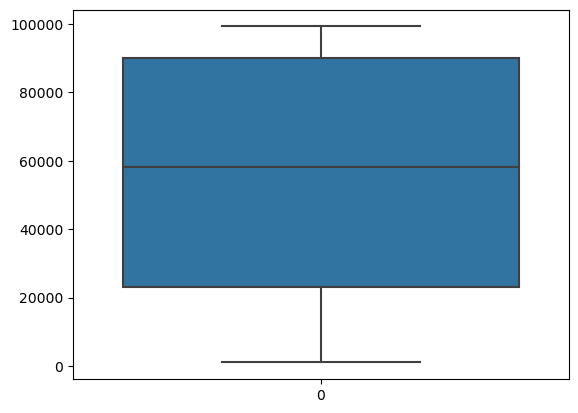

In [208]:
sns.boxplot(df['postal_code'])    
plt.show()

In [209]:
# Assuming your dataframe is named df
# Convert "order_date" and "ship_date" to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

# Display the resulting dataframe
print(df)

        id        order_id order_date  ship_date       ship_mode customer_id  \
0        1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1        2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2        3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3        4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4        5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
...    ...             ...        ...        ...             ...         ...   
9795  9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class    SH-19975   
9796  9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9797  9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9798  9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   
9799  9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class    CS-12490   

         customer_name    segment      

In [210]:
df.head()

,id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             9789 non-null   int64         
 1   order_id       9789 non-null   object        
 2   order_date     9789 non-null   datetime64[ns]
 3   ship_date      9789 non-null   datetime64[ns]
 4   ship_mode      9789 non-null   object        
 5   customer_id    9789 non-null   object        
 6   customer_name  9789 non-null   object        
 7   segment        9789 non-null   object        
 8   country        9789 non-null   object        
 9   city           9789 non-null   object        
 10  state          9789 non-null   object        
 11  postal_code    9789 non-null   float64       
 12  region         9789 non-null   object        
 13  product_id     9789 non-null   object        
 14  category       9789 non-null   object        
 15  sub_category   9789 non-nu

In [212]:
df.columns

Index(['id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub_category', 'product_name',
       'sales'],
      dtype='object')

In [213]:
drop_columns = ['id','order_id','customer_name','country','product_name','product_id','customer_id']
df.drop(columns=drop_columns, inplace=True)


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    9789 non-null   datetime64[ns]
 1   ship_date     9789 non-null   datetime64[ns]
 2   ship_mode     9789 non-null   object        
 3   segment       9789 non-null   object        
 4   city          9789 non-null   object        
 5   state         9789 non-null   object        
 6   postal_code   9789 non-null   float64       
 7   region        9789 non-null   object        
 8   category      9789 non-null   object        
 9   sub_category  9789 non-null   object        
 10  sales         9789 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(7)
memory usage: 1.1+ MB


In [215]:
df.describe(include='all')

,order_date,ship_date,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales
count,9789,9789,9789,9789,9789,9789,9789.000000,9789,9789,9789,9789.000000
unique,NaN,NaN,4,3,529,48,NaN,4,3,17,NaN
top,NaN,NaN,Standard Class,Consumer,New York City,California,NaN,West,Office Supplies,Binders,NaN
freq,NaN,NaN,5849,5096,891,1946,NaN,3140,5903,1492,NaN
mean,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,230.116193
min,2015-01-03 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000
25%,2016-05-23 00:00:00,2016-05-27 00:00:00,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,54.384000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,210.392000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,22638.480000


In [216]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_to_encode = ['ship_mode','segment','city','state','region','category','sub_category']


for column in labels_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


df.describe()

,order_date,ship_date,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales
count,9789,9789,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000,9789.000000
mean,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,2.235877,0.657677,279.240474,22.313617,55273.322403,1.572173,0.972827,7.590969,230.116193
min,2015-01-03 00:00:00,2015-01-07 00:00:00,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,0.000000,0.000000,0.444000
25%,2016-05-23 00:00:00,2016-05-27 00:00:00,2.000000,0.000000,165.000000,4.000000,23223.000000,1.000000,1.000000,3.000000,17.248000
50%,2017-06-26 00:00:00,2017-06-29 00:00:00,3.000000,0.000000,293.000000,27.000000,58103.000000,1.000000,1.000000,9.000000,54.384000
75%,2018-05-15 00:00:00,2018-05-19 00:00:00,3.000000,1.000000,393.000000,36.000000,90008.000000,3.000000,1.000000,12.000000,210.392000
max,2018-12-30 00:00:00,2019-01-05 00:00:00,3.000000,2.000000,528.000000,47.000000,99301.000000,3.000000,2.000000,16.000000,22638.480000
std,NaN,NaN,1.100134,0.762706,138.308727,15.387228,32041.223413,1.162618,0.629506,5.052061,625.302079


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    9789 non-null   datetime64[ns]
 1   ship_date     9789 non-null   datetime64[ns]
 2   ship_mode     9789 non-null   int32         
 3   segment       9789 non-null   int32         
 4   city          9789 non-null   int32         
 5   state         9789 non-null   int32         
 6   postal_code   9789 non-null   float64       
 7   region        9789 non-null   int32         
 8   category      9789 non-null   int32         
 9   sub_category  9789 non-null   int32         
 10  sales         9789 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int32(7)
memory usage: 908.1 KB


In [218]:
dfcopy = df.copy()

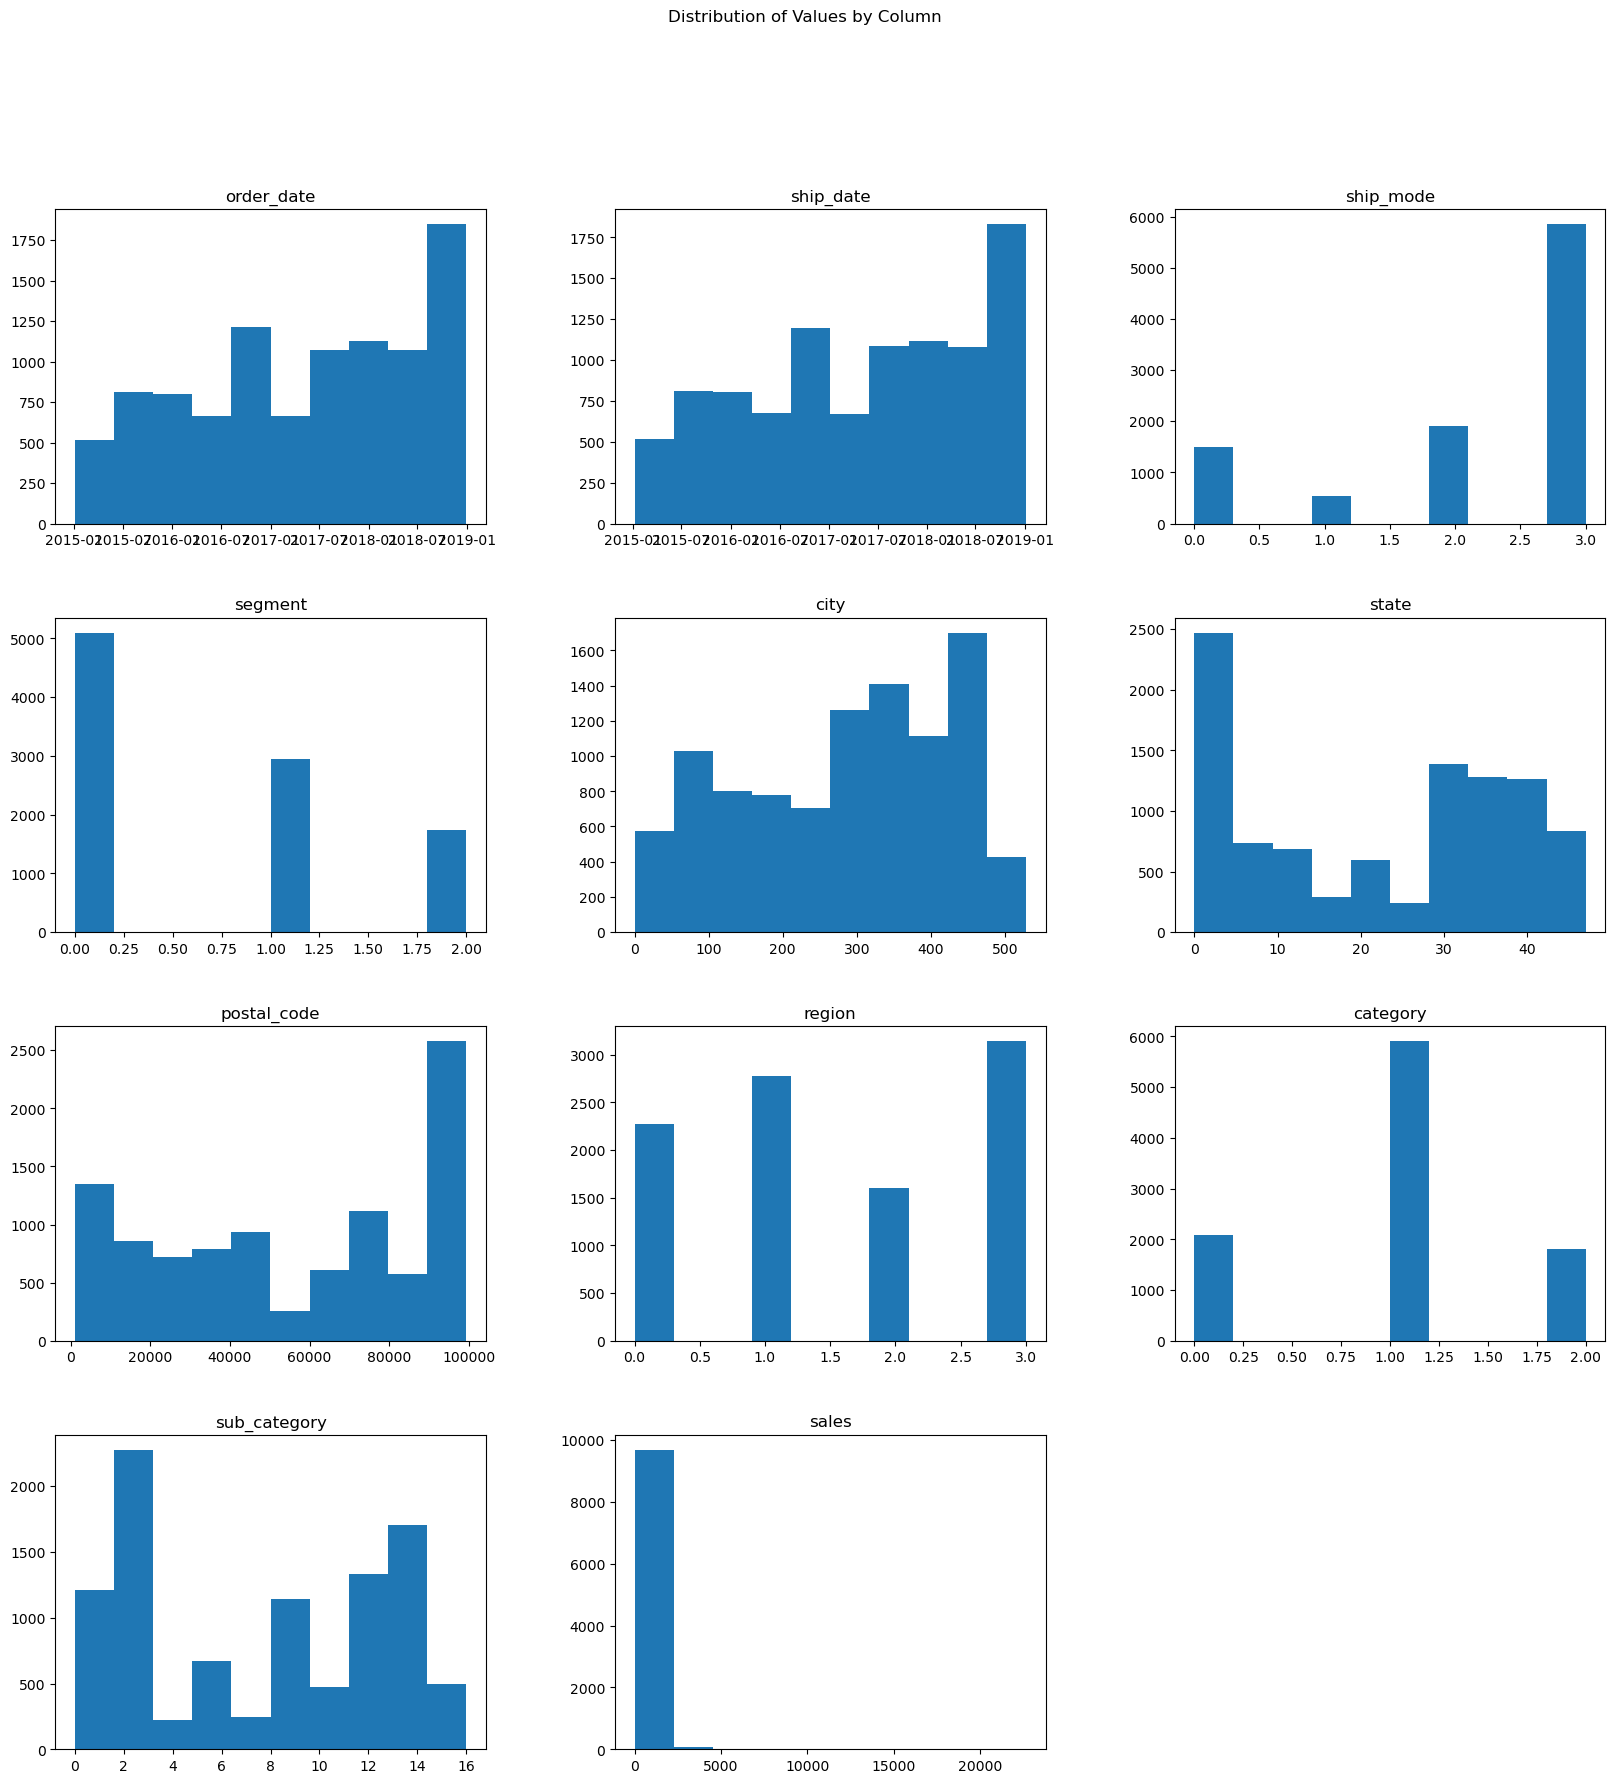

In [219]:
df.hist(bins=10, figsize=(20, 20), grid=False)
plt.suptitle('Distribution of Values by Column')
plt.show()

In [220]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is named df
# Extract the 'sales' column
sales_data = df['sales'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the sales data
scaled_sales = scaler.fit_transform(sales_data)

# Replace the 'sales' column with the standardized values
df['sales'] = scaled_sales

In [221]:
df['order_date'] = (df['order_date'].astype('int64') // 10**9)
df['ship_date'] = (df['ship_date'].astype('int64') // 10**9)

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    9789 non-null   int64  
 1   ship_date     9789 non-null   int64  
 2   ship_mode     9789 non-null   int32  
 3   segment       9789 non-null   int32  
 4   city          9789 non-null   int32  
 5   state         9789 non-null   int32  
 6   postal_code   9789 non-null   float64
 7   region        9789 non-null   int32  
 8   category      9789 non-null   int32  
 9   sub_category  9789 non-null   int32  
 10  sales         9789 non-null   float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 908.1 KB


In [223]:
#features = df[['order_date', 'ship_date', 'ship_mode', 'segment', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'sales']]
features = df[df.columns.tolist()]
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df[df.columns.tolist()] = scaled_features 

Algorithms

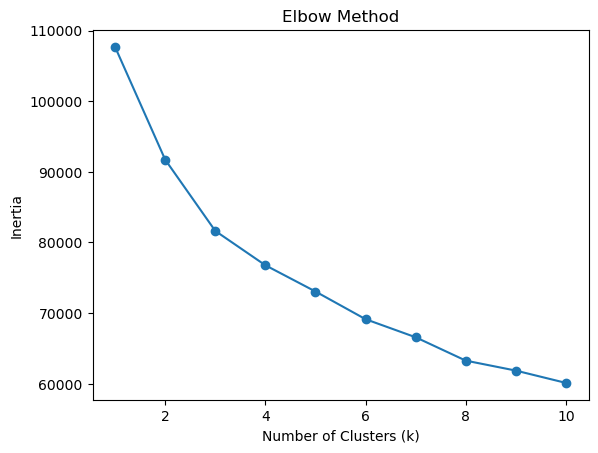

In [224]:
from sklearn.cluster import KMeans
X = df[df.columns]

# If your data needs preprocessing (e.g., handling missing values, scaling), do it here.

# Determine the optimal number of clusters (k) using the elbow method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

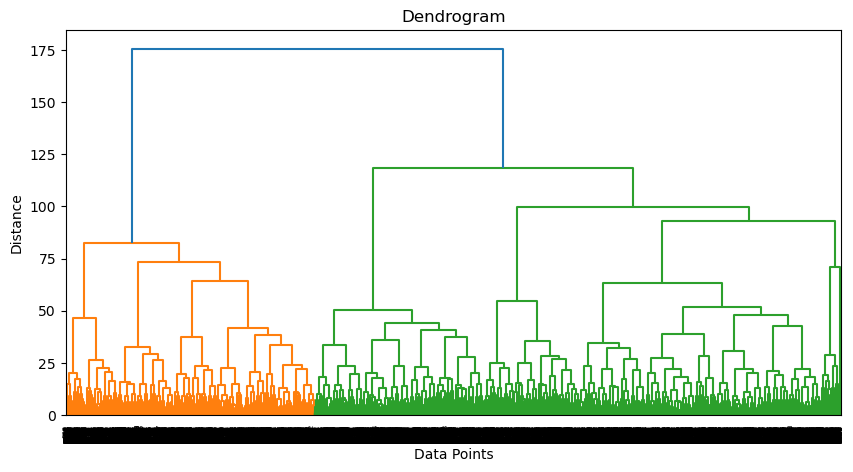

In [225]:
from scipy.cluster import hierarchy
# Perform hierarchical clustering
Z = hierarchy.linkage(df, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

# Show plot
plt.show()

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = hierarchy.linkage(df, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

# Set threshold
threshold = 100  # Adjust the threshold as needed

# Draw a horizontal line at the threshold
plt.axhline(y=threshold, color='r', linestyle='--')

# Show plot
plt.show()

In [64]:
df.describe()

,order_date,ship_date,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,sub_category,sales
count,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03,9.789000e+03
mean,-2.790562e-15,-1.677459e-15,-8.565128e-17,8.964351e-17,-7.984442e-18,-7.258583e-17,-1.451717e-17,2.104989e-17,7.258583e-18,2.830848e-17,-9.653916e-17,-4.572908e-17,5.081008e-18
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-2.017866e+00,-2.017955e+00,-2.032472e+00,-1.753350e+00,-8.623386e-01,-2.019068e+00,-1.450213e+00,-1.692697e+00,-1.352338e+00,-1.705382e+00,-1.545459e+00,-1.502626e+00,-3.673167e-01
25%,-8.153965e-01,-8.153775e-01,-2.144185e-01,-8.522082e-01,-8.623386e-01,-8.260239e-01,-1.190244e+00,-1.000335e+00,-4.921667e-01,-8.445935e-01,4.316834e-02,-9.087784e-01,-3.404420e-01
50%,1.327958e-01,1.305234e-01,6.946083e-01,2.268658e-02,-8.623386e-01,9.948923e-02,3.045787e-01,8.831817e-02,-4.921667e-01,-6.741356e-02,4.316834e-02,2.789164e-01,-2.810500e-01
75%,9.003801e-01,9.005533e-01,6.946083e-01,8.800835e-01,4.488500e-01,8.225463e-01,8.895093e-01,1.084118e+00,1.228176e+00,8.541813e-01,4.316834e-02,8.727638e-01,-3.154507e-02
max,1.444581e+00,1.449556e+00,6.946083e-01,1.711234e+00,1.760039e+00,1.798673e+00,1.604424e+00,1.374165e+00,1.228176e+00,1.827081e+00,1.631796e+00,1.664560e+00,3.583789e+01


In [29]:
dfCopy = df.copy()


,order_date,ship_date,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales
0,0.453613,0.451369,-0.214419,-0.862339,-0.616337,-0.475329,-0.401170,0.368005,-1.545459,-0.710829,0.050928
1,0.453613,0.451369,-0.214419,-0.862339,-0.616337,-0.475329,-0.401170,0.368005,-1.545459,-0.512880,0.802571
2,0.099526,0.099627,-0.214419,0.448850,-0.102967,-1.255236,1.084991,1.228176,0.043168,0.476866,-0.344645
3,-0.480321,-0.473142,0.694608,-0.862339,-0.912791,-0.930275,-0.685475,0.368005,-1.545459,1.664560,1.163435
4,-0.480321,-0.473142,0.694608,-0.862339,-0.912791,-0.930275,-0.685475,0.368005,0.043168,1.268662,-0.332254
...,...,...,...,...,...,...,...,...,...,...,...
9795,0.047245,0.054471,0.694608,0.448850,-1.440622,-0.735298,0.166565,-1.352338,0.043168,-0.908778,-0.361953
9796,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,0.043168,-1.106728,-0.351445
9797,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,1.631796,1.070713,0.008111
9798,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,1.631796,1.070713,-0.325843


In [30]:

# Choose the number of clusters (k)
k = 3
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster_label'] = kmeans.fit_predict(scaled_features)

y_kmeans = df['cluster_label']

cluster_distribution = df['cluster_label'].value_counts()
print(cluster_distribution)

C:\Users\luka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_label
1    3723
0    3068
2    2998
Name: count, dtype: int64


In [31]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
silhouette_avg = silhouette_score(scaled_features, y_kmeans)
print("The average silhouette score is:", silhouette_avg)

#Davies bouldin index -"separation" between clusters.
db_index = davies_bouldin_score(scaled_features, y_kmeans)
print("Davies-Bouldin Index:", db_index)

# Calculate inertia - average distance between all pairs of points in the same cluster.
intra_cluster_distance = kmeans.inertia_
print("Intra-cluster distance (inertia):", intra_cluster_distance)


The average silhouette score is: 0.15037484353490813
Davies-Bouldin Index: 2.0648764411777534
Intra-cluster distance (inertia): 81639.89741651985


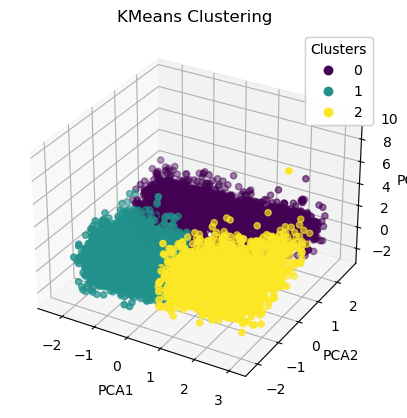

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dfCopyPCA = df.copy()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

# Add the cluster information to the DataFrame
dfCopyPCA['PCA1'] = reduced_features[:, 0]
dfCopyPCA['PCA2'] = reduced_features[:, 1]
dfCopyPCA['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyPCA['PCA1'], dfCopyPCA['PCA2'], dfCopyPCA['PCA3'], c=df['cluster_label'], cmap='viridis')
plt.title('KMeans Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     9789 non-null   float64
 1   ship_date      9789 non-null   float64
 2   ship_mode      9789 non-null   float64
 3   segment        9789 non-null   float64
 4   city           9789 non-null   float64
 5   state          9789 non-null   float64
 6   postal_code    9789 non-null   float64
 7   region         9789 non-null   float64
 8   category       9789 non-null   float64
 9   sub_category   9789 non-null   float64
 10  sales          9789 non-null   float64
 11  cluster_label  9789 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 1.2 MB


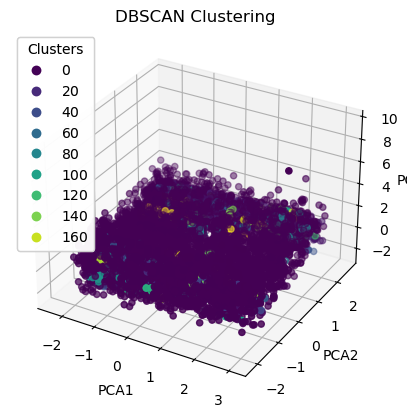

In [69]:
from sklearn.cluster import DBSCAN


dfCopyDBSCAN = df.copy()
pca = PCA(n_components=3)

# Create and fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_features)
y_dbscan = labels
dfCopyDBSCAN['cluster_label'] = labels

reduced_features = pca.fit_transform(scaled_features)

# Add the cluster information to the DataFrame
dfCopyDBSCAN['PCA1'] = reduced_features[:, 0]
dfCopyDBSCAN['PCA2'] = reduced_features[:, 1]
dfCopyDBSCAN['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyDBSCAN['PCA1'], dfCopyDBSCAN['PCA2'], dfCopyDBSCAN['PCA3'], c=dfCopyDBSCAN['cluster_label'], cmap='viridis')
plt.title('DBSCAN Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()



array([ -1,   0,  19,   1,   2,   3,   4,  55,   5,   6,   7,   8,   9,
        10,  11,  12, 105, 140,  13,  14,  15,  16,  17, 145,  18,  20,
       167,  21,  22,  23,  24,  25,  26,  27, 152,  74,  28,  29,  30,
        31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41, 142, 154,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  99,
       158,  54, 150, 141,  96,  56, 175,  57,  58,  59,  60,  61,  62,
        63,  64,  65, 174, 121,  66,  67,  68,  69, 131,  70, 139,  71,
        72,  81,  73, 103, 157, 168,  75,  76,  77,  78,  79,  80, 155,
        82,  83, 166,  84,  85,  86, 130, 122, 129,  87, 136, 133,  88,
        89, 172,  90,  91, 156,  92, 138, 153,  93,  97,  94, 165,  95,
        98, 100, 101, 102, 104, 106, 171, 107, 108, 109, 137, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 173, 125,
       126, 127, 160, 128, 170, 161, 132, 134, 135, 169, 164, 143, 144,
       163, 146, 147, 148, 149, 151, 159, 162], dtype=int64)

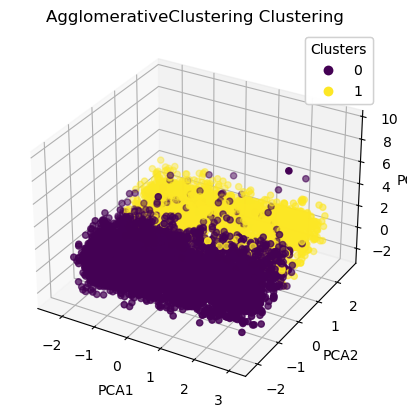

In [79]:
#hiearchical merging agglometrive clustering

from sklearn.cluster import AgglomerativeClustering

dfCopyAglomerative = df.copy()
pca = PCA(n_components=3)


cluster = AgglomerativeClustering(n_clusters=2)
# Train model
model = cluster.fit(scaled_features)

y_aglo =  model.labels_
dfCopyAglomerative['cluster_label'] = model.labels_

reduced_features = pca.fit_transform(scaled_features)

# Add the cluster information to the DataFrame
dfCopyAglomerative['PCA1'] = reduced_features[:, 0]
dfCopyAglomerative['PCA2'] = reduced_features[:, 1]
dfCopyAglomerative['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyAglomerative['PCA1'], dfCopyAglomerative['PCA2'], dfCopyAglomerative['PCA3'], c=dfCopyAglomerative['cluster_label'], cmap='viridis')
plt.title('AgglomerativeClustering Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

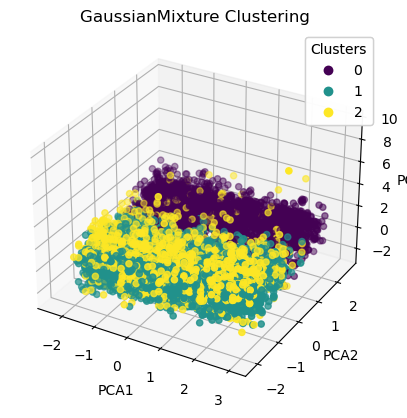

In [78]:
from sklearn.mixture import GaussianMixture

dfCopyGMM = df.copy()
pca = PCA(n_components=3)

################
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
y_gmm = labels
dfCopyGMM['cluster_label'] = labels


reduced_features = pca.fit_transform(scaled_features)
# Add the cluster information to the DataFrame
dfCopyGMM['PCA1'] = reduced_features[:, 0]
dfCopyGMM['PCA2'] = reduced_features[:, 1]
dfCopyGMM['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyGMM['PCA1'], dfCopyGMM['PCA2'], dfCopyGMM['PCA3'], c=dfCopyGMM['cluster_label'], cmap='viridis')
plt.title('GaussianMixture Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [95]:
#poredjenje velicina


#Kmeans
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
Ksilhouette_avg = silhouette_score(scaled_features, y_kmeans)
print("The average silhouette score is:", Ksilhouette_avg)
#Davies bouldin index -"separation" between clusters.
Kdb_index = davies_bouldin_score(scaled_features, y_kmeans)
print("Davies-Bouldin Index:", Kdb_index)

#Dbscan
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
Dsilhouette_avg = silhouette_score(scaled_features, y_dbscan)
print("The average silhouette score is:", Dsilhouette_avg)
#Davies bouldin index -"separation" between clusters.
Ddb_index = davies_bouldin_score(scaled_features, y_dbscan)
print("Davies-Bouldin Index:", Ddb_index)


#Aglometative
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
Asilhouette_avg = silhouette_score(scaled_features, y_aglo)
print("The average silhouette score is:", Asilhouette_avg)
#Davies bouldin index -"separation" between clusters.
Adb_index = davies_bouldin_score(scaled_features, y_aglo)
print("Davies-Bouldin Index:", Adb_index)


#GMM
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
Gsilhouette_avg = silhouette_score(scaled_features, y_gmm)
print("The average silhouette score is:", Gsilhouette_avg)
#Davies bouldin index -"separation" between clusters.
Gdb_index = davies_bouldin_score(scaled_features, y_gmm)
print("Davies-Bouldin Index:", Gdb_index)

The average silhouette score is: 0.15037484353490813
Davies-Bouldin Index: 2.0648764411777534
The average silhouette score is: -0.38740279531765587
Davies-Bouldin Index: 1.226515487503333
The average silhouette score is: 0.16260881321603607
Davies-Bouldin Index: 2.1560733839099906
The average silhouette score is: 0.09351869292740352
Davies-Bouldin Index: 4.473544082001187


In [96]:
row_names = ['Kmeans','Dbscan','Aglometative','GMM']
matData = {
    'Silhuette score':[Ksilhouette_avg,Dsilhouette_avg,Asilhouette_avg,Gsilhouette_avg],
    'Davies-Bouldin Index':[Kdb_index,Ddb_index,Adb_index,Gdb_index]
}

df_scores = pd.DataFrame(matData, index=row_names)
print(df_scores)

              Silhuette score  Davies-Bouldin Index
Kmeans               0.150375              2.064876
Dbscan              -0.387403              1.226515
Aglometative         0.162609              2.156073
GMM                  0.093519              4.473544


Reduction of dimensionality

order_date     -0.242138
ship_date      -0.000000
ship_mode       0.000000
segment        -0.000000
city           -0.000000
state           0.048192
postal_code    -0.234826
region         -0.291638
category        0.000000
sub_category   -0.000000
sales           0.000000
dtype: float64


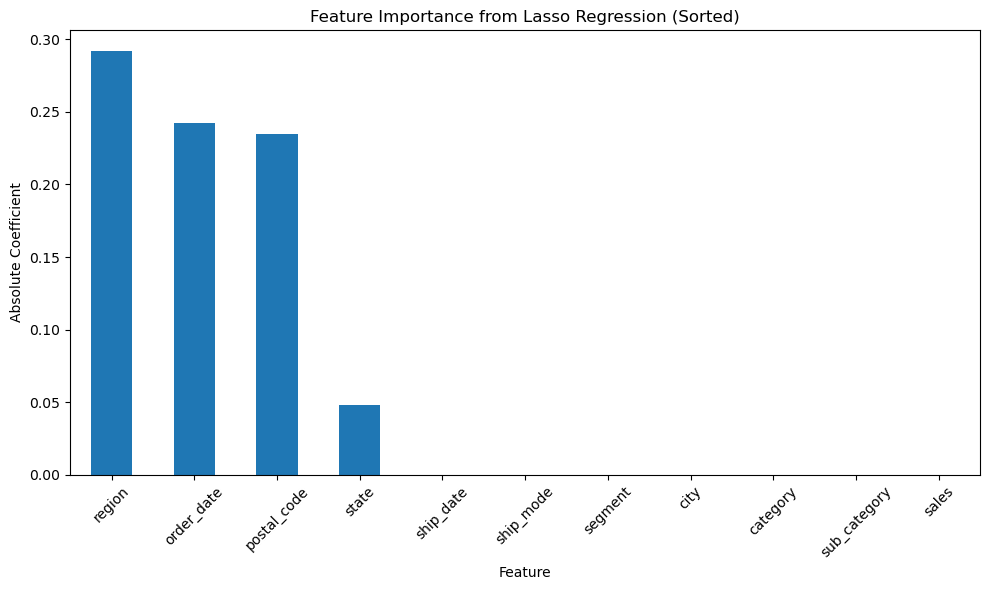

In [63]:
from sklearn.linear_model import Lasso


cluster_data = df.copy()

# Separate features and target variable
X = cluster_data.drop(columns=['cluster_label'])  # Features
y = cluster_data['cluster_label']  # Target variable (assuming 'sales' is the target)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as per your requirement
lasso.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.Series(lasso.coef_, index=X.columns)

# Print or visualize feature importance for the current cluster
#print(f"Cluster {cluster_label} Feature Importance:")
print(feature_importance)


# Plot feature importance
plt.figure(figsize=(10, 6))

# Take absolute values of feature importance for sorting
abs_feature_importance = feature_importance.abs()
sorted_abs_feature_importance = abs_feature_importance.sort_values(ascending=False)

# Plot sorted absolute feature importance
sorted_abs_feature_importance.plot(kind='bar')
plt.title('Feature Importance from Lasso Regression (Sorted)')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

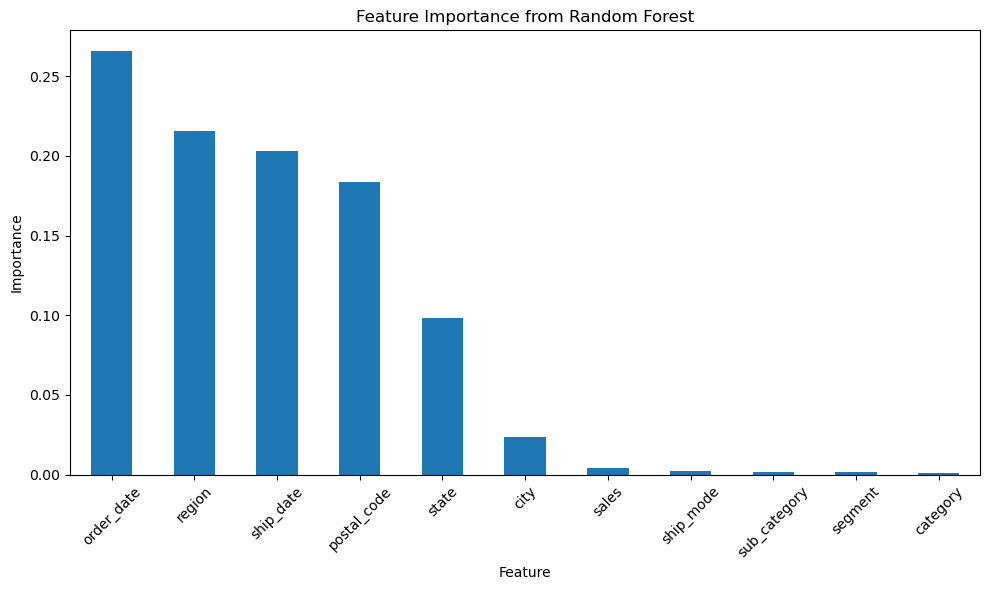

In [64]:
from sklearn.ensemble import RandomForestClassifier  # Assuming you're working with classification

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the parameters as needed
# Train the model
rf.fit(X_scaled, y)
# Get feature importances
feature_importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
# Plot feature importances from Random Forest
plt.figure(figsize=(10, 6))
sorted_feature_importances_rf = feature_importances_rf.sort_values(ascending=False)
sorted_feature_importances_rf.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
#redukcija dimenzionalnosti
dfCopy 

,order_date,ship_date,ship_mode,segment,city,state,postal_code,region,category,sub_category,sales
0,0.453613,0.451369,-0.214419,-0.862339,-0.616337,-0.475329,-0.401170,0.368005,-1.545459,-0.710829,0.050928
1,0.453613,0.451369,-0.214419,-0.862339,-0.616337,-0.475329,-0.401170,0.368005,-1.545459,-0.512880,0.802571
2,0.099526,0.099627,-0.214419,0.448850,-0.102967,-1.255236,1.084991,1.228176,0.043168,0.476866,-0.344645
3,-0.480321,-0.473142,0.694608,-0.862339,-0.912791,-0.930275,-0.685475,0.368005,-1.545459,1.664560,1.163435
4,-0.480321,-0.473142,0.694608,-0.862339,-0.912791,-0.930275,-0.685475,0.368005,0.043168,1.268662,-0.332254
...,...,...,...,...,...,...,...,...,...,...,...
9795,0.047245,0.054471,0.694608,0.448850,-1.440622,-0.735298,0.166565,-1.352338,0.043168,-0.908778,-0.361953
9796,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,0.043168,-1.106728,-0.351445
9797,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,1.631796,1.070713,0.008111
9798,-1.129084,-1.126717,0.694608,0.448850,1.473298,0.694532,-0.363872,-0.492167,1.631796,1.070713,-0.325843


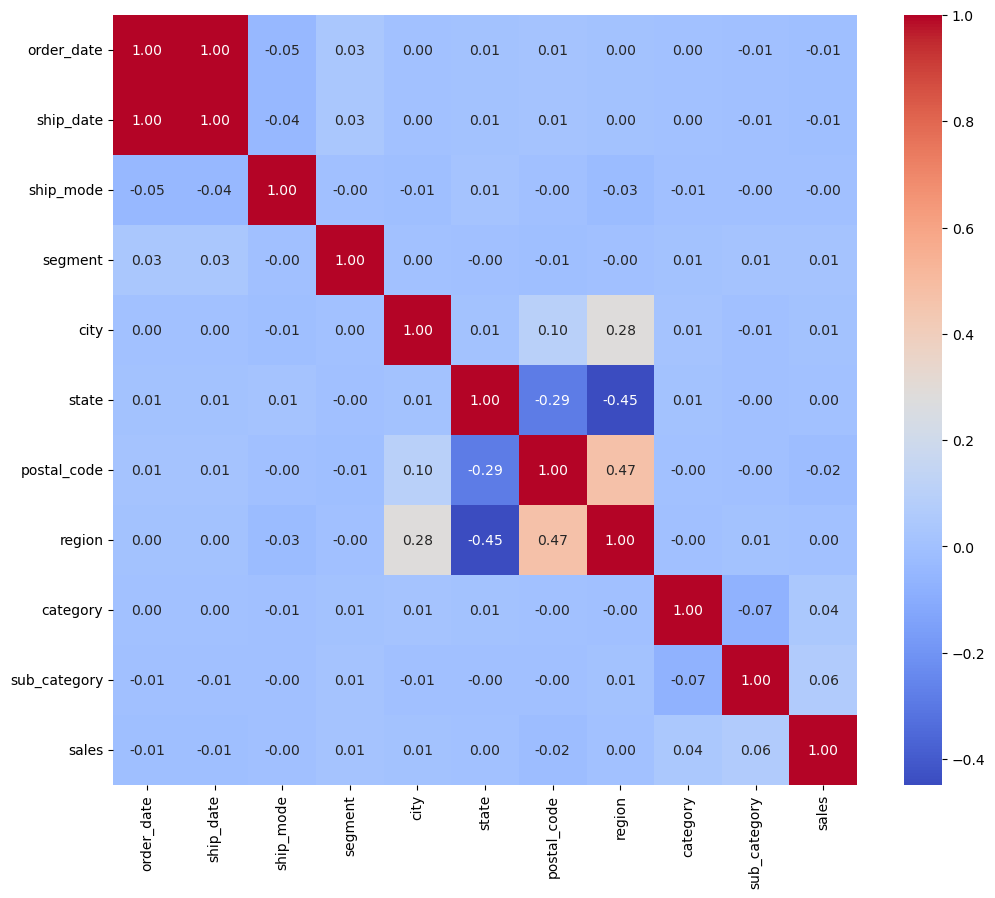

In [102]:
#correlation_matrix = x.corr()
df_cor = df.drop(columns='cluster_label')
correlation_matrix = df_cor.corr()

# You can also create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [156]:
df_clean = df_cor.copy()
#col_to_drop = ['ship_date']
col_to_drop=['ship_date','ship_mode','sub_category','segment','category']
df_clean.drop(columns=col_to_drop,inplace=True)
scaled_features_clean = df_clean.values
scaled_features_clean

array([[ 0.4536128 , -0.61633731, -0.4753287 , -0.40117004,  0.36800466,
         0.05092808],
       [ 0.4536128 , -0.61633731, -0.4753287 , -0.40117004,  0.36800466,
         0.8025712 ],
       [ 0.09952593, -0.10296676, -1.25523612,  1.08499145,  1.22817602,
        -0.34464495],
       ...,
       [-1.12908422,  1.47329773,  0.69453243, -0.36387243, -0.49216669,
         0.00811139],
       [-1.12908422,  1.47329773,  0.69453243, -0.36387243, -0.49216669,
        -0.32584347],
       [-1.12908422,  1.47329773,  0.69453243, -0.36387243, -0.49216669,
        -0.35141962]])

In [157]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_date   9789 non-null   float64
 1   city         9789 non-null   float64
 2   state        9789 non-null   float64
 3   postal_code  9789 non-null   float64
 4   region       9789 non-null   float64
 5   sales        9789 non-null   float64
dtypes: float64(6)
memory usage: 793.4 KB


C:\Users\luka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster_label
0    6467
1    3322
Name: count, dtype: int64


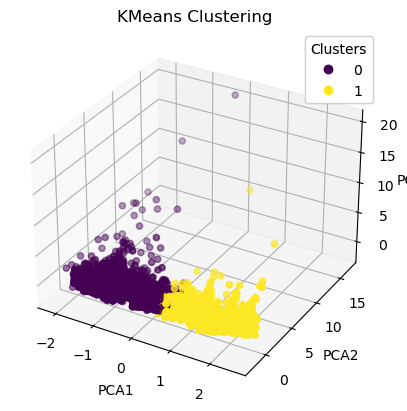

In [169]:
# Choose the number of clusters (k)
k = 2
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster_label'] = kmeans.fit_predict(scaled_features_clean)

y_kmeans2 = df_clean['cluster_label']

cluster_distribution = df_clean['cluster_label'].value_counts()
print(cluster_distribution)



dfCopyPCA2 = df_clean.copy()

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features_clean)

# Add the cluster information to the DataFrame
dfCopyPCA2['PCA1'] = reduced_features[:, 0]
dfCopyPCA2['PCA2'] = reduced_features[:, 1]
dfCopyPCA2['PCA3'] = reduced_features[:, 2]

# Plot clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(dfCopyPCA2['PCA1'], dfCopyPCA2['PCA2'], dfCopyPCA2['PCA3'], c=dfCopyPCA2['cluster_label'], cmap='viridis')
plt.title('KMeans Clustering')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [170]:
#Kmeans
# Compute Silhouette Score - similar an object is to its own cluster compared to other clusters
Ksilhouette_avg = silhouette_score(scaled_features_clean, y_kmeans2)
print("The average silhouette score is:", Ksilhouette_avg)

The average silhouette score is: 0.3088990823602874


In [171]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     9789 non-null   float64
 1   city           9789 non-null   float64
 2   state          9789 non-null   float64
 3   postal_code    9789 non-null   float64
 4   region         9789 non-null   float64
 5   sales          9789 non-null   float64
 6   cluster_label  9789 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 831.6 KB


Final

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


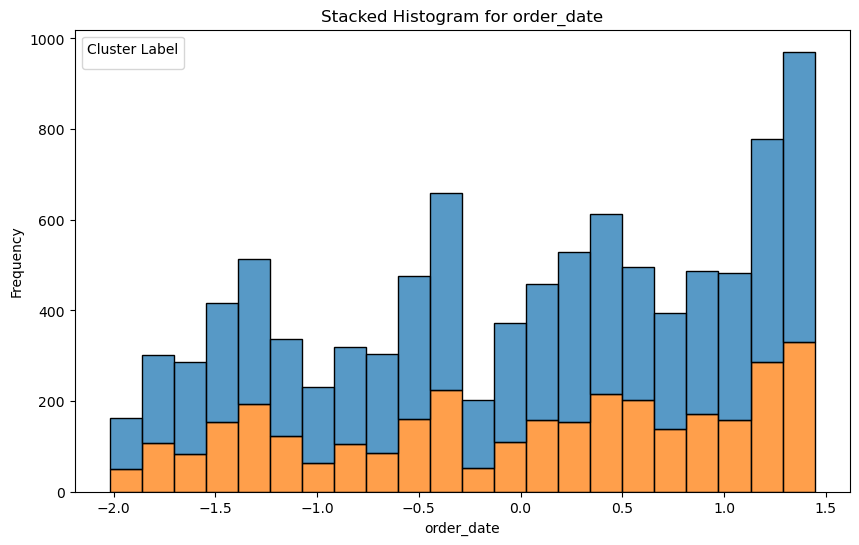

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


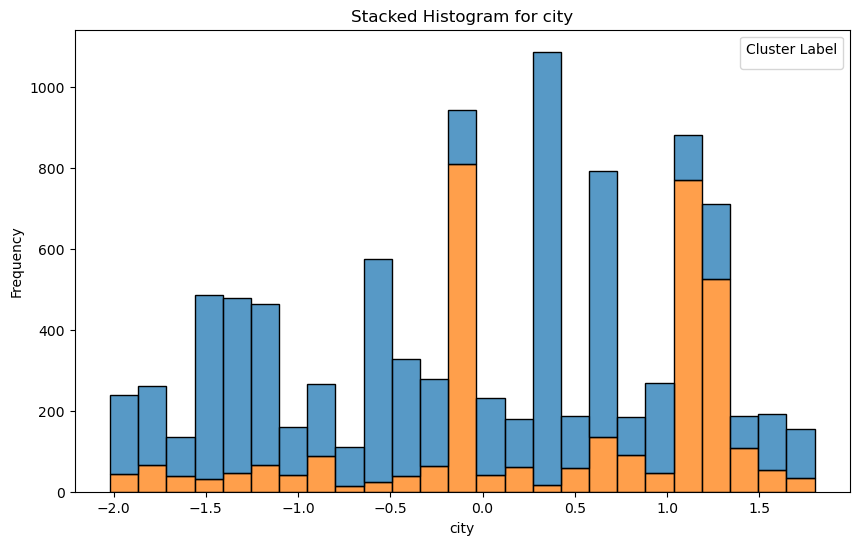

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


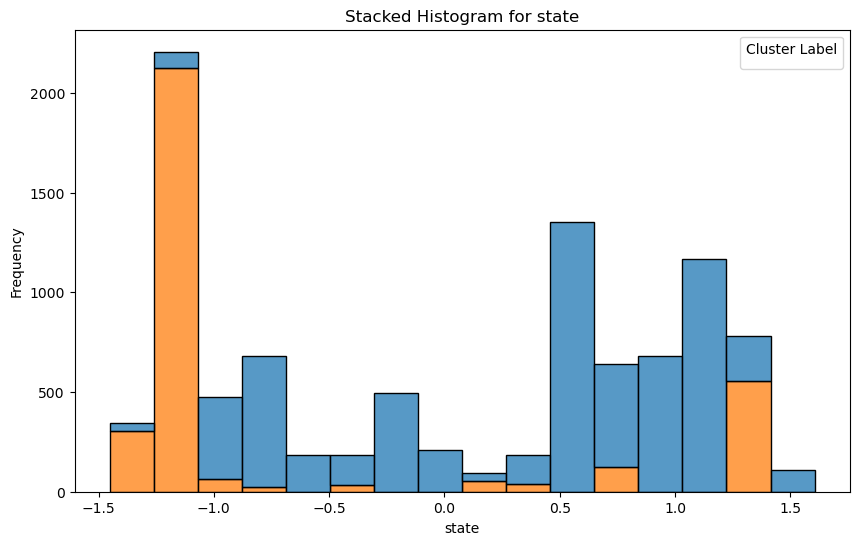

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


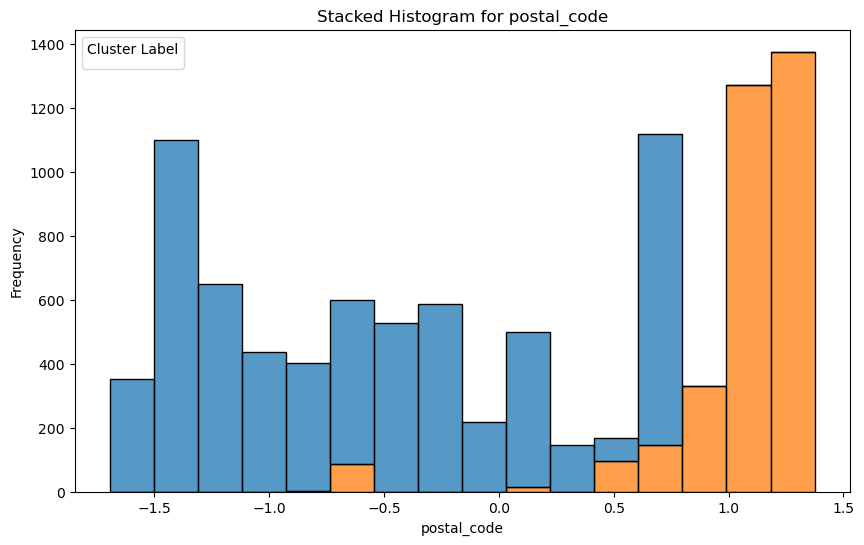

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


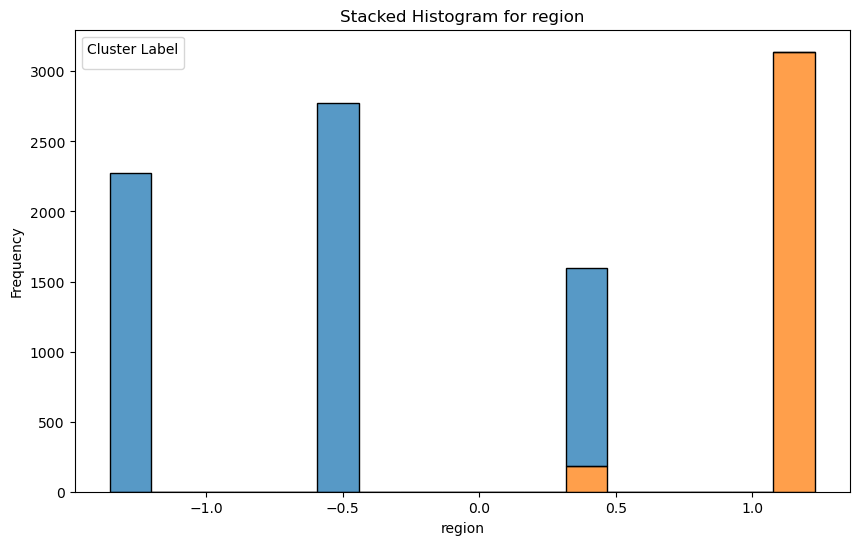

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


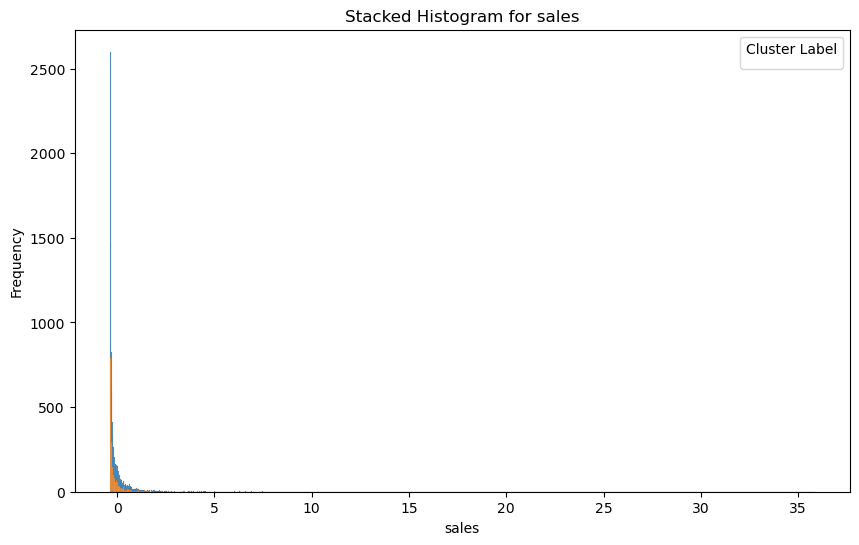

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


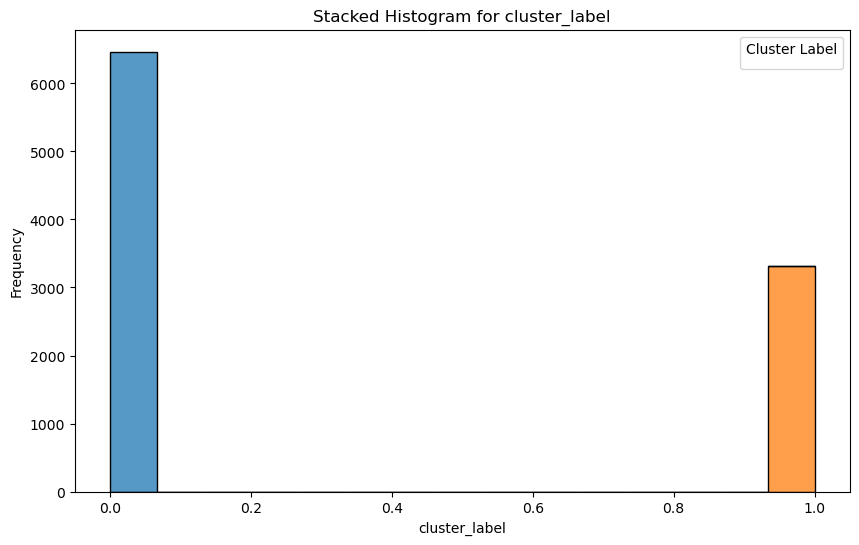

In [172]:
#prikaz novi
# Define colors for each cluster label
palette = 'tab10'  # You can define a custom palette if needed

# Plot stacked histograms for each column
for column in df_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x=column, hue="cluster_label", multiple="stack", palette=palette)
    plt.title(f'Stacked Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster Label')
    plt.grid(False)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


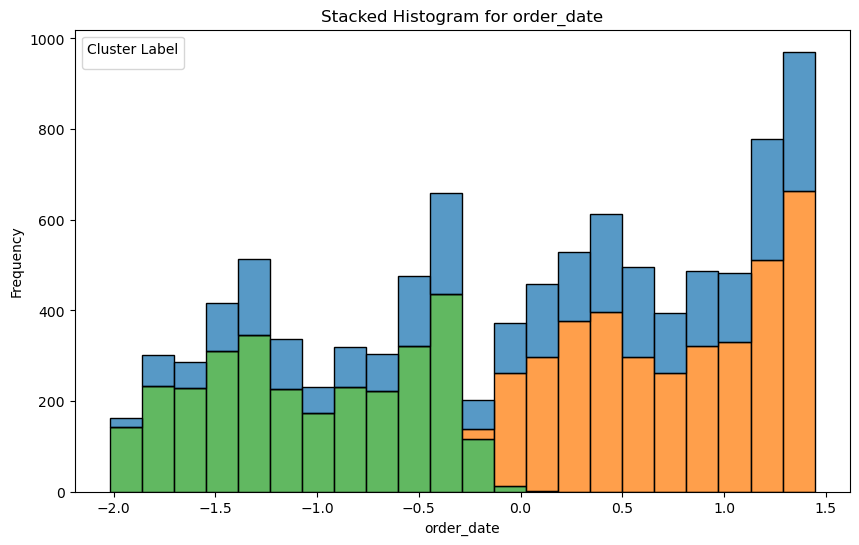

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


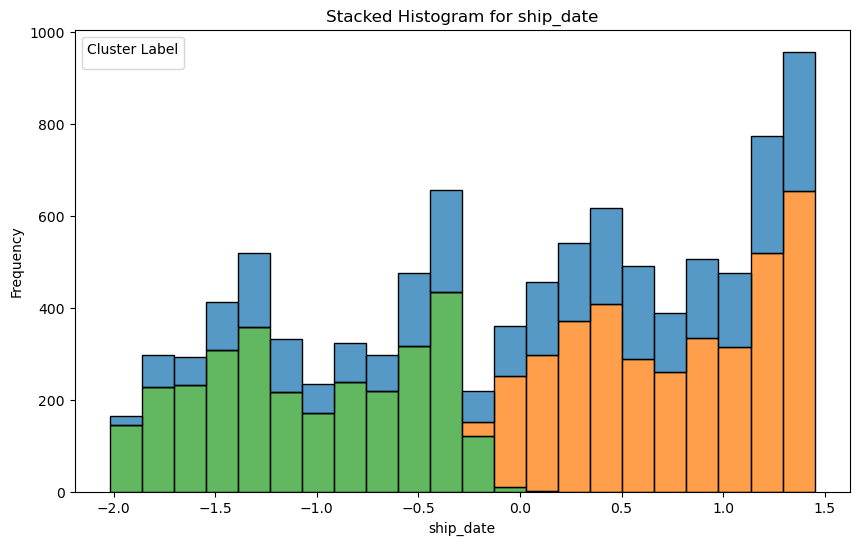

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


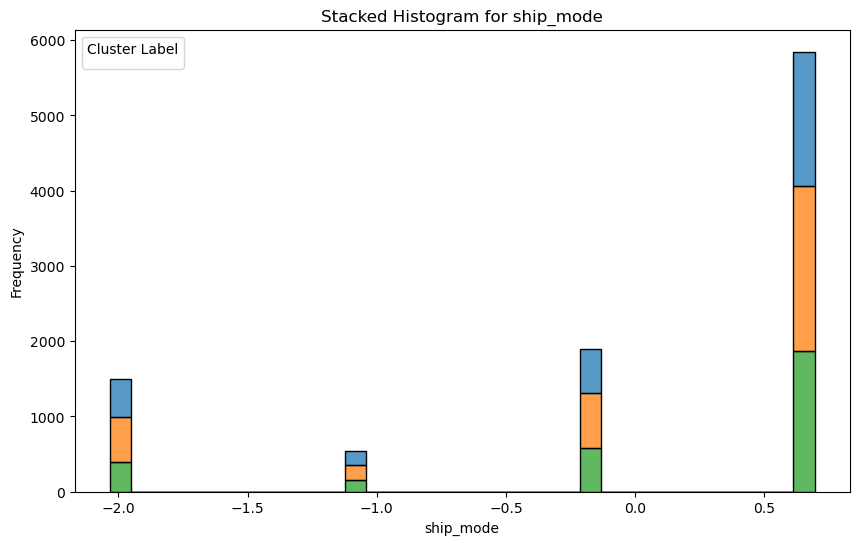

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


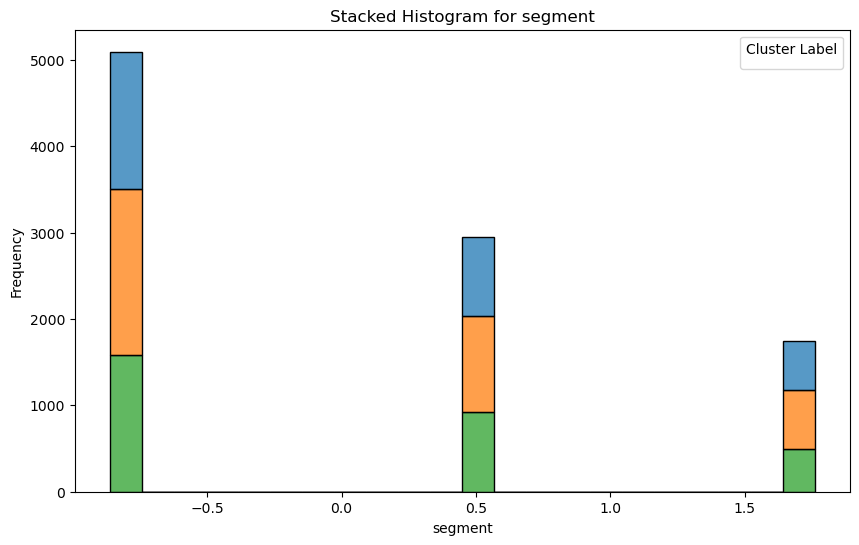

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


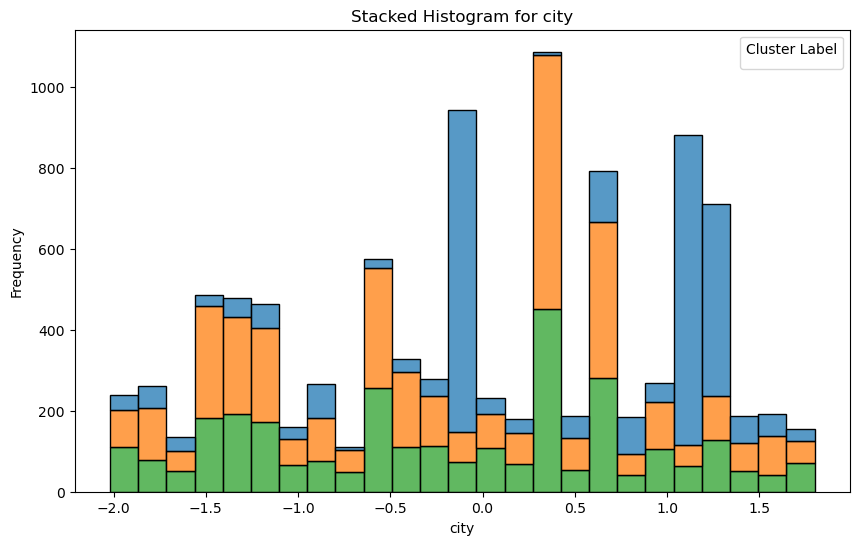

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


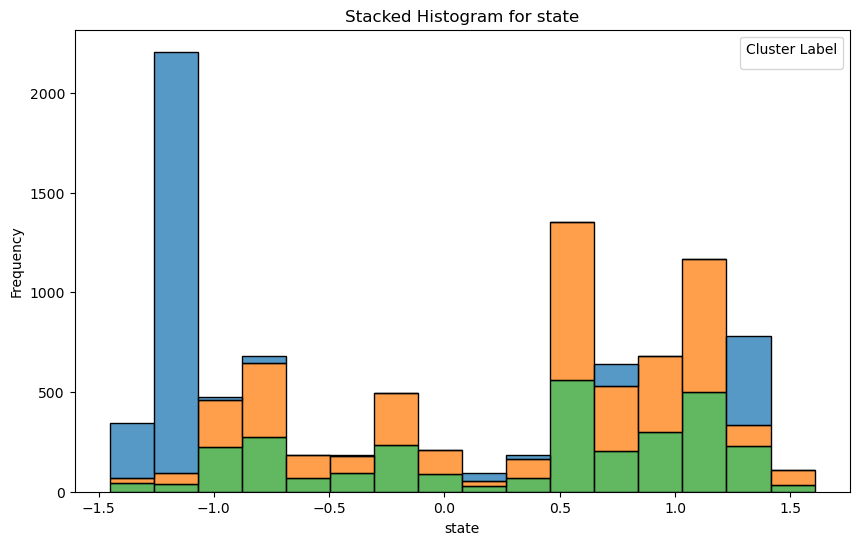

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


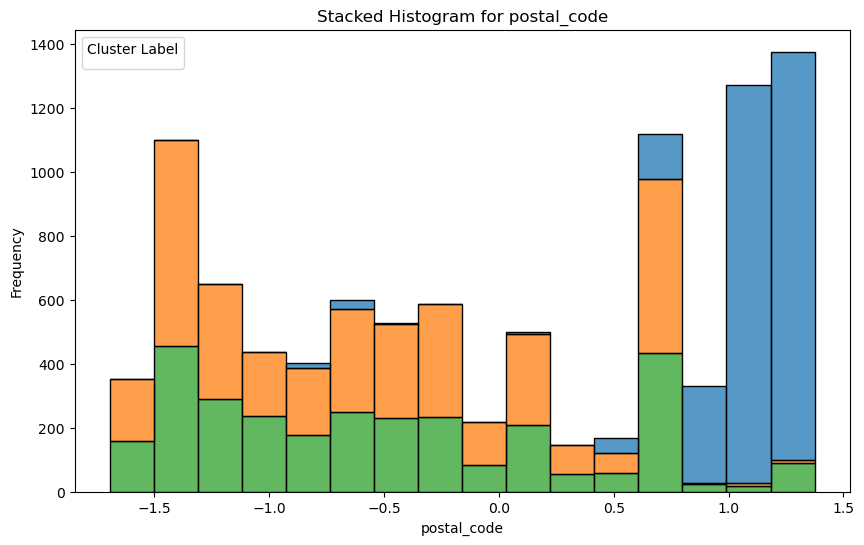

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


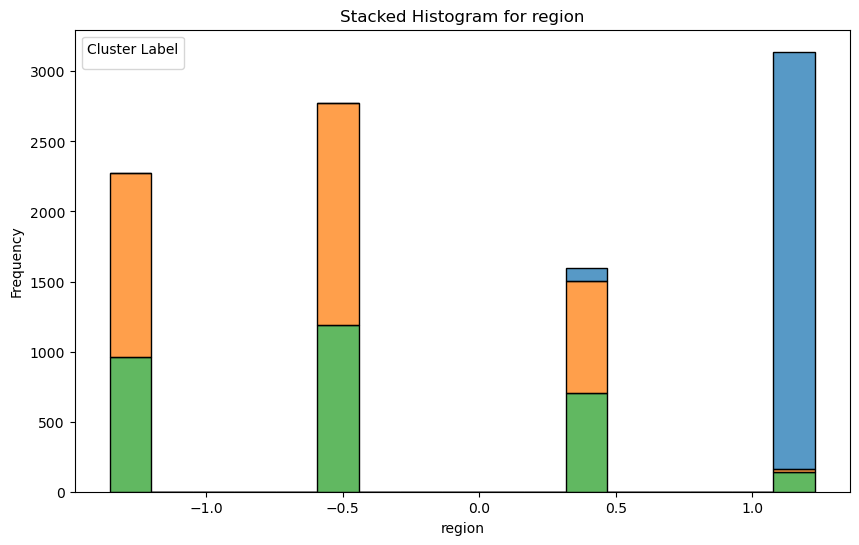

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


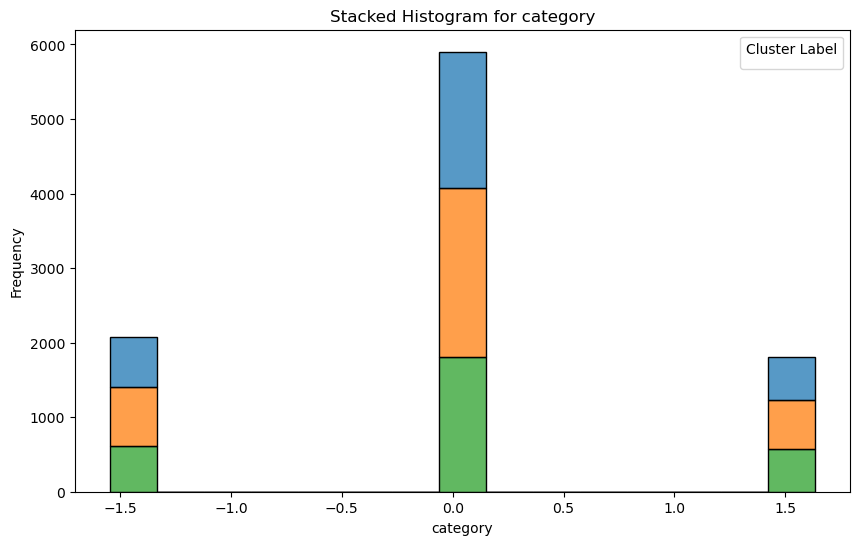

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


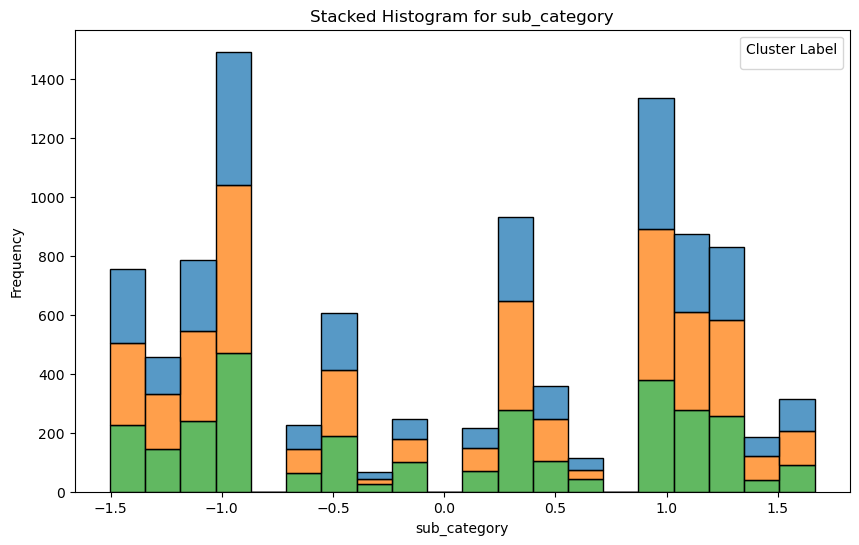

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


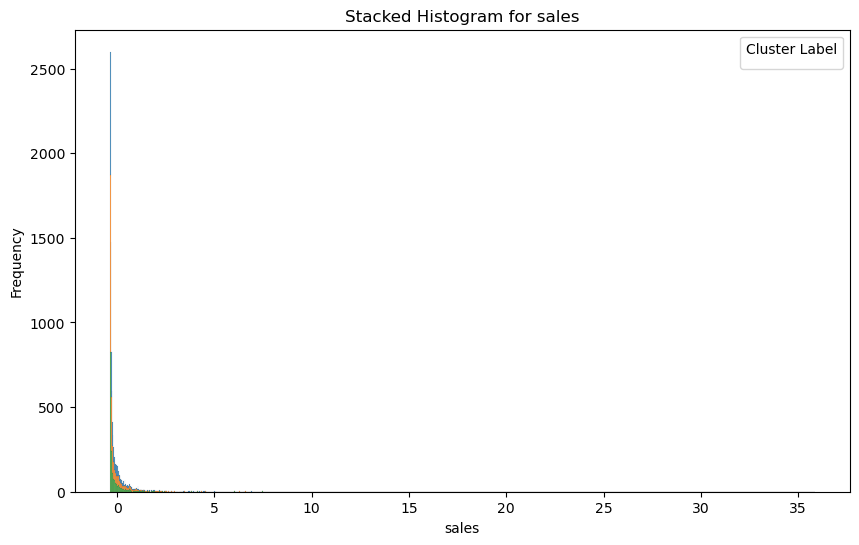

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


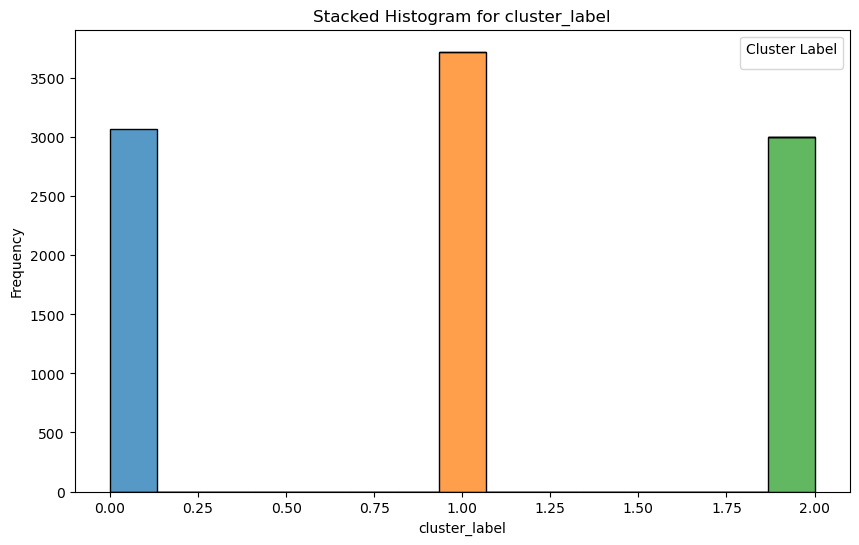

In [177]:
#prikaz novi
# Define colors for each cluster label
palette = 'tab10'  # You can define a custom palette if needed

# Plot stacked histograms for each column
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue="cluster_label", multiple="stack", palette=palette)
    plt.title(f'Stacked Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster Label')
    plt.grid(False)
    plt.show()